In [1]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
%matplotlib inline

In [2]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJ1'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJ2'), ['GND', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJ3'), ['GND', '3'])
FQ3JJ.add_element(QCapacitance('C1'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('C2'), ['GND', '2'])
FQ3JJ.add_element(QCapacitance('C3'), ['GND', '3'])
        
phi = QVariable('φ')
phix1 = QVariable('φx1')
#phix2 = QVariable('φx2')
phi.create_grid(16, 1)
FQ3JJ.add_variable(phi)
FQ3JJ.add_variable(phix1)
#FQ3JJ.add_variable(phix2)
#FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQ3JJ.map_nodes_linear(['GND', '1', '2', '3'], 
                       ['φ', 'φx1'], 
                       np.asarray([[0,0],[1,0],[1,1],[1,2]]))

#EjEc_ratio = 80
alpha = 0.65
flux_steps = 128
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 200e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
FQ3JJ.find_element('JJ1').set_critical_current(Ej)
FQ3JJ.find_element('JJ2').set_critical_current(Ej)
FQ3JJ.find_element('C1').set_capacitance(2/Ec)
FQ3JJ.find_element('C2').set_capacitance(2/Ec)
FQ3JJ.find_element('JJ3').set_critical_current(Ej*alpha)
FQ3JJ.find_element('C3').set_capacitance(2*alpha/Ec)
for phix1_id, phix1_value in enumerate(np.linspace(-np.pi, np.pi, flux_steps)):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phix1.set_parameter(phix1_value, 0)
        #phix2.set_parameter(phix2_value, 0)
    FQ3JJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[phix1_id, :] = eigenenergies
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

<ipython-input-2-ea7fc72ff61d>:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  energies = np.zeros((flux_steps,4), dtype=np.float)
C:\notebooks\The Great Tomb of Secrets\Old notebooks\QCircuit.py:349: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Aii = self.capacitance_matrix_variables(symbolic)[np.meshgrid(inverted_indeces, inverted_indeces)].T
C:\notebooks\The Great Tomb of Secrets\Old notebooks\QCircuit.py:350: FutureWarning: Using a

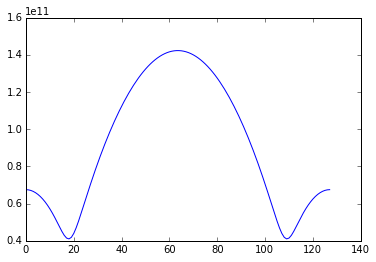

In [40]:
plt.plot(energies[:,1]-energies[:,0])

In [27]:
print (Ej)
print (Ec)

200000000000.0
21804529205.379208
